LOGISTIC REGRESSION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data_banknote_authentication_dataset.csv')

In [ ]:
data.head()

,Notes,Variance_WT,Skewness_WT,Curtosis_WT,Entropy,Class
0,1,3.62160,8.6661,-2.8073,-0.44699,0
1,2,4.54590,8.1674,-2.4586,-1.46210,0
2,3,3.86600,-2.6383,1.9242,0.10645,0
3,4,3.45660,9.5228,-4.0112,-3.59440,0
4,5,0.32924,-4.4552,4.5718,-0.98880,0


<Axes: xlabel='Class', ylabel='count'>

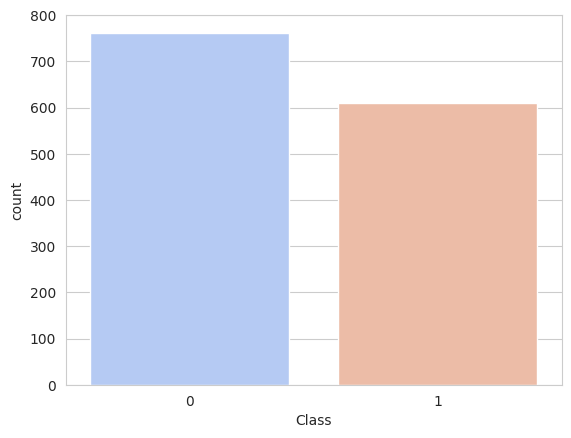

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=data,palette='coolwarm')

In [ ]:
# Normalization (0 - 1)
col_names = data.columns
from sklearn import preprocessing
data = pd.DataFrame(preprocessing.minmax_scale(data, feature_range=(0, 1), axis=0, copy=True))
data.columns = col_names
data.Class = data.Class.astype(int)

# Separating the Class column from the rest of the data
y_test = pd.DataFrame(data['Class'])
#data.drop(['Class'], axis=1, inplace=True)
data

# Inspecting the variables data
data

,Notes,Variance_WT,Skewness_WT,Curtosis_WT,Entropy,Class
0,0.000000,0.769004,0.839643,0.106783,0.736628,0
1,0.000729,0.835659,0.820982,0.121804,0.644326,0
2,0.001459,0.786629,0.416648,0.310608,0.786951,0
3,0.002188,0.757105,0.871699,0.054921,0.450440,0
4,0.002918,0.531578,0.348662,0.424662,0.687362,0
...,...,...,...,...,...,...
1367,0.997082,0.537124,0.565855,0.165249,0.726398,1
1368,0.997812,0.407690,0.332868,0.506753,0.808350,1
1369,0.998541,0.237385,0.011768,0.985603,0.524755,1
1370,0.999271,0.250842,0.201701,0.761587,0.660675,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Class',axis=1),
                                                    data['Class'], test_size=0.20, random_state=0)

In [ ]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [ ]:
X_train = X_train.T #transpose
Y_train = Y_train.reshape(1, X_train.shape[1]) #1Xm

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
print("Shape of X_train : ", X_train.shape)  #nxm
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (5, 1097)
Shape of Y_train :  (1, 1097)
Shape of X_test :  (5, 275)
Shape of Y_test :  (1, 275)


In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def model(X, Y, learning_rate, iterations):

    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))  #set the initial values to 0.
    B = 0

    cost_list = []

    for i in range(iterations):

        Z = np.dot(W.T, X) + B  #1Xm
        A = sigmoid(Z)

        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        # Keeping track of our cost function value
        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)

    return W, B, cost_list

In [ ]:
iterations = 10000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  1000 iteration is :  0.6557473477436397
cost after  2000 iteration is :  0.6250068887950625
cost after  3000 iteration is :  0.5973560374811967
cost after  4000 iteration is :  0.5720327006042405
cost after  5000 iteration is :  0.5487413220843835
cost after  6000 iteration is :  0.5272760067049747
cost after  7000 iteration is :  0.5074595657957945
cost after  8000 iteration is :  0.48913318049037025
cost after  9000 iteration is :  0.47215395340265487


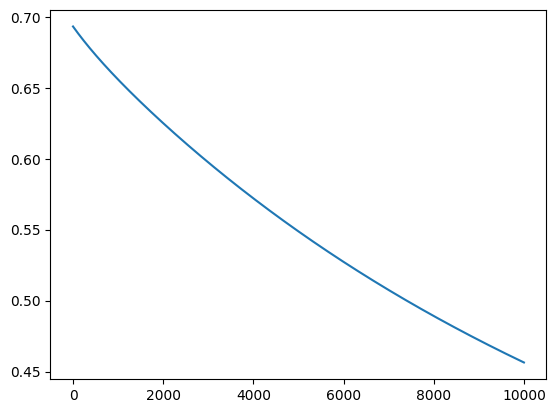

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()
#as the number of iterations increases cost function values decreases.

In [ ]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5  #threshold

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")  #round off to 2

In [ ]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  98.55 %


......................................................................................................................................................

......................................................................................................................................................

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
#Here we are again splitting the data because in Logisticregression we have repshaped the data, which won't work here.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Class',axis=1),
                                                    data['Class'], test_size=0.20, random_state=0)

In [ ]:
#training the model
model.fit(X_train,Y_train)

SVC()

In [ ]:
#training accuracy
model.score(X_train,Y_train)

1.0

In [ ]:
# Using the model to predict the labels of the test data
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[157   0]
 [  0 118]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
# Calculating accuracy
accuracy = accuracy_score(Y_test, Y_pred)*100
print(accuracy, "%")

100.0 %


Using Grid search to find best values of C and gamma Hyperparameters

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

#grid.fit fits the gridsearchCV object(grid) to the training data.
#grid.fit evaluates the performance of each combination of hyperparameters
grid.fit(X_train,Y_train)

In [ ]:
grid.best_params_          #to retrieve the best hyperparameters

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(Y_test,grid_predictions))

[[157   0]
 [  0 118]]


In [ ]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
# Calculating accuracy
accuracy = accuracy_score(Y_test, grid_predictions)*100
print(accuracy, "%")

100.0 %


......................................................................................................................................................

......................................................................................................................................................

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
pred = rfc.predict(X_test)
print(confusion_matrix(pred, Y_test))

[[157   0]
 [  0 118]]


In [ ]:
print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
# Calculating accuracy
accuracy = accuracy_score(Y_test, pred)*100
print(accuracy, "%")

100.0 %
